# Dimensionality Reduction and Classification of Signed Distance Fields using PCA, TSNE, and KNN

## Problem Description
In this problem you will use PCA and TSNE to apply dimensionality reduction to 64x64 images of signed distance fields (SDFs) on parts belonging to 8 different classes. Each class is topologicaly similar, with some variation in void size and shape. These signed distance fields are helpful in the prediction of internal stress fields in the parts. You will also apply KNN to predict the class of the part with the reduced space.



#### Summary of deliverables:

- 3x8 subplot visualization of the first 3 samples from each of the 8 classes
- Bar plot of the variance explained for the first 25 PCs and the number of PCs required to explain > 90% of the variance in the training data
- 4x8 subplot visualization of reconstructed samples using 3, 10, 50 and all PCs on the first sample from each of the 8 classes in the test set
- Test accuracy of KNN classifier trained on the 3D, 10D, and 50D PCA reduced feature spaces
- Plot of the 2D TSNE reduced feature space
- Test accuracy of the KNN classifier trained on the 2D TSNE reduced feature space
- Discussion questions 1 and 2

#### Imports and Utility Functions:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

def dataLoader(filepath):
    # Load and flatten the SDF dataset
    mat = io.loadmat(filepath)
    data = []
    for i in range(800):
        sdf = mat["sdf"][i][0].T
        data.append(sdf.flatten())
    data = np.vstack(data)
    # Assign labels
    labels = np.repeat(np.arange(8), 100)
    return data, labels

def plot_sdf(data, ax = None, title = None):
    # If no axes, make them
    if ax is None:
        ax = plt.gca()
    # Reshape image data into square
    sdf = data.reshape(64,64)
    # Plot image, with bounds of the SDF values for the entire dataset
    ax.imshow(sdf, vmin=-0.31857, vmax=0.206349, cmap="jet")
    ax.axis('off')
    # If there is a title, add it
    if title:
        ax.set_title(title)

## Visualization

Using the provided `dataLoader()` function, load the data and labels from `sdf_images.mat`. The returned data will contain 800 samples, with 4096 features. Then, using the provided `plot_sdf()` function, generate a 3x8 subplot figure containing visualizations of the first 3 SDFs in each class.

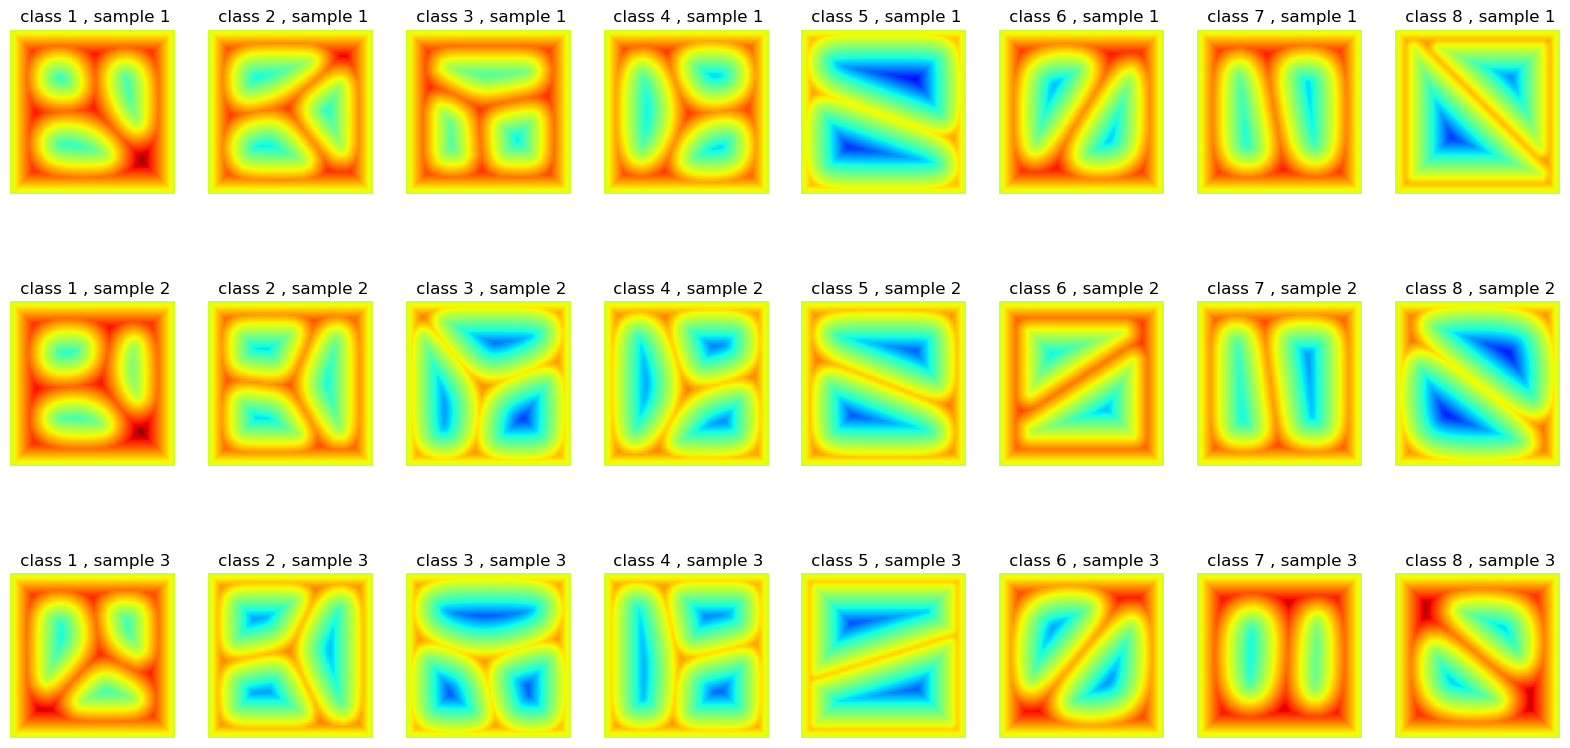

In [2]:
data, labels = dataLoader('data/sdf_images.mat')

fig, axes = plt.subplots(3, 8, figsize=(20, 10))
for i in range(8):  
    class_data = data[labels == i][:3] 
    for j in range(3):  
        plot_sdf(class_data[j], ax=axes[j, i], title=f" class {i+1} , sample {j+1}")

plt.show()


## Explained Variance

Use `train_test_split()` to partition the data and labels into a training and test set with `test_size = 0.2` and `random_state = 0`. Then train a PCA model on the training data and generate a bar plot of the variance explained for the first 25 principal components. Determine the number of principal components required to explain > 90% of the variance in the training data.

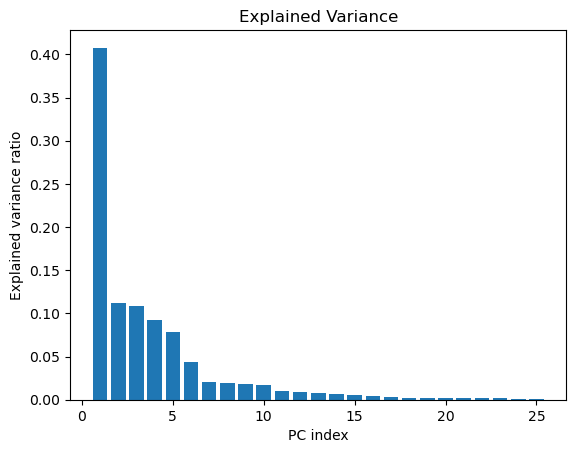

The number of principal components required to explain > 90% of the variance in the training data:  9


In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)
pca = PCA(n_components=25)
pca.fit(X_train)
explain_var = pca.explained_variance_ratio_

plt.bar(range(1, 26), explain_var)
plt.ylabel('Explained variance ratio')
plt.xlabel('PC index')
plt.title('Explained Variance')
plt.show()

sum_var = np.cumsum(explain_var)
exp_90 = np.argmax(sum_var > 0.9) + 1
print("The number of principal components required to explain > 90% of the variance in the training data: ",exp_90)

## PCA Reconstruction

Using the training data, generate 4 PCA models using 3, 10, 50, and all of the principal components. Use these models to transform the test data into the reduced space, and then reconstruct the data from the reduced space. Plot the reconstruction for each model, on the first occurence of each class in the test set. Your generated plot should be a 4x8 subplot figure, with each subplot title containing the class and the number of PCs used.

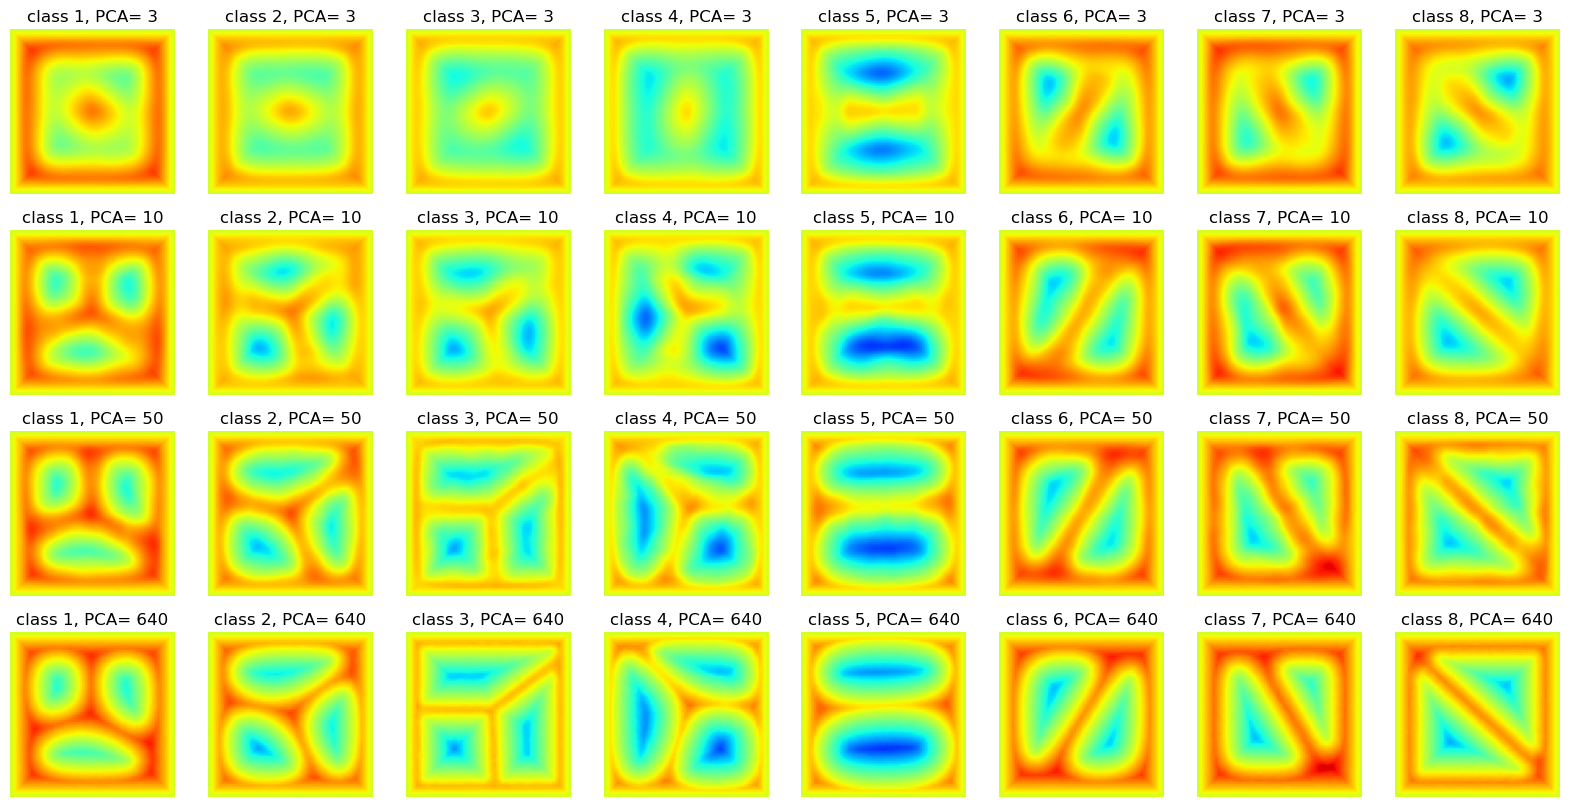

In [4]:
num_components = [3, 10, 50, 640] 
fig, axes = plt.subplots(4, 8, figsize=(20, 10))

first_occurrences = {}

for i, n in enumerate(num_components):
    
    pca = PCA(n_components=n)
    pca.fit(X_train)
    
    X_test_pca = pca.transform(X_test)
    X_test_reconstructed = pca.inverse_transform(X_test_pca)

    for j in range(len(X_test)):
        label = y_test[j]
        if label not in first_occurrences:
            first_occurrences[label] = j
            
            plot_sdf(X_test_reconstructed[j], ax=axes[i, label], title=f'class {label+1}, PCA= {n}')
            
    first_occurrences = {}

plt.show()

## KNN on PCA Reduced Data

Now train a KNN classifier to predict the class of the 3D, 10D, and 50D PCA reduced data. You should train the KNN on the reduced training data, and report the prediction accuracy on the test set. You will also need to determine the `n_neighbors` parameter for your KNN classifier that gives good results.

In [5]:
from sklearn.metrics import accuracy_score

comps = [3, 10, 50]
neighbors = [2, 3, 4, 5, 6, 7, 8, 9]

for n in comps:
    for neighbor in neighbors:
        pca = PCA(n_components=n)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        knn = KNeighborsClassifier(n_neighbors= neighbor)
        knn.fit(X_train_pca, y_train)
        y_pred = knn.predict(X_test_pca)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy of {n} PCA for {neighbor} neighbors is {accuracy}")
        


Accuracy of 3 PCA for 2 neighbors is 0.675
Accuracy of 3 PCA for 3 neighbors is 0.70625
Accuracy of 3 PCA for 4 neighbors is 0.70625
Accuracy of 3 PCA for 5 neighbors is 0.7
Accuracy of 3 PCA for 6 neighbors is 0.7
Accuracy of 3 PCA for 7 neighbors is 0.7125
Accuracy of 3 PCA for 8 neighbors is 0.69375
Accuracy of 3 PCA for 9 neighbors is 0.7
Accuracy of 10 PCA for 2 neighbors is 0.85625
Accuracy of 10 PCA for 3 neighbors is 0.8625
Accuracy of 10 PCA for 4 neighbors is 0.8625
Accuracy of 10 PCA for 5 neighbors is 0.86875
Accuracy of 10 PCA for 6 neighbors is 0.89375
Accuracy of 10 PCA for 7 neighbors is 0.9
Accuracy of 10 PCA for 8 neighbors is 0.9125
Accuracy of 10 PCA for 9 neighbors is 0.90625
Accuracy of 50 PCA for 2 neighbors is 0.875
Accuracy of 50 PCA for 3 neighbors is 0.8875
Accuracy of 50 PCA for 4 neighbors is 0.86875
Accuracy of 50 PCA for 5 neighbors is 0.88125
Accuracy of 50 PCA for 6 neighbors is 0.88125
Accuracy of 50 PCA for 7 neighbors is 0.89375
Accuracy of 50 PCA fo

## TSNE Visualization
First reduced the full dataset to 50D using PCA, and then further reduced the data to 2D using TSNE. Plot the 2D reduced feature space with a scatter plot, coloring each point according to its class.

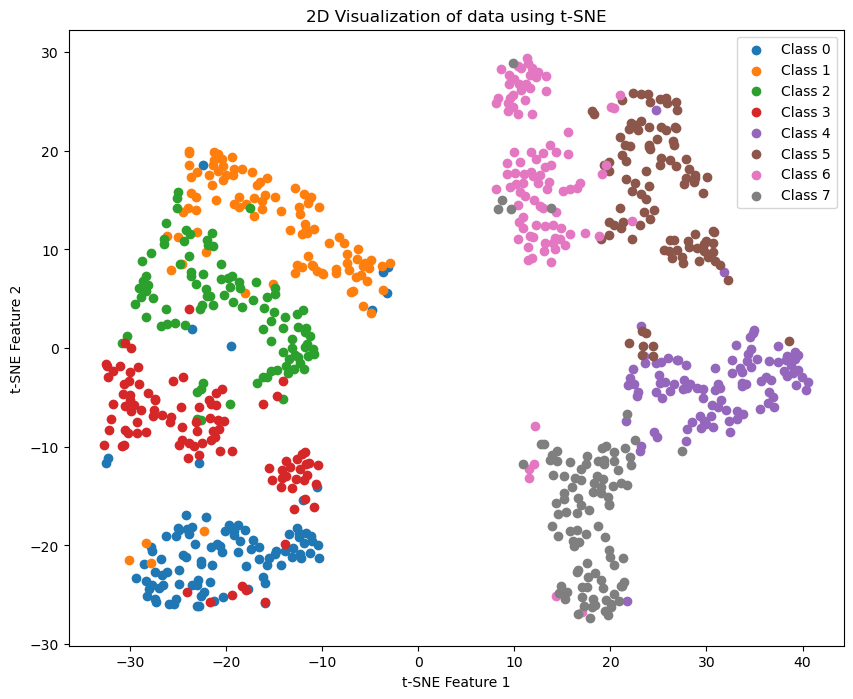

In [6]:
pca = PCA(n_components=50)
data_50 = pca.fit_transform(data)

tsne = TSNE(n_components=2, random_state=0)
data_2D = tsne.fit_transform(data_50)

plt.figure(figsize=(10, 8))
for class_val in np.unique(labels):
    
    indices = np.where(labels == class_val)
    plt.scatter(data_2D[indices, 0], data_2D[indices, 1], label=f'Class {class_val}')

plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.title('2D Visualization of data using t-SNE')
plt.legend()
plt.show()

## KNN on PCA/TSNE Reduced Data

Using the same 2D PCA/TSNE data, split the data into train and test data and labels using `train_test_split` with a `random_state = 0` parameter so you have the same train/test partition as before. Then, train a KNN on this 2D feature space with the training set, and report the KNN classifier accuracy on the test set. Again, you will need to determine the `n_neighbors` parameter in the KNN classifier that gives good results.

In [7]:
# YOUR CODE GOES HERE

X_train, X_test, y_train, y_test = train_test_split(data_2D, labels, test_size=0.2, random_state=0)
neighbors = [2, 3, 4, 5, 6, 7, 8, 9]

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors= neighbor)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of 2D PCA/t-SNE data with {neighbor} neighbors is {accuracy}")

Accuracy of 2D PCA/t-SNE data with 2 neighbors is 0.85625
Accuracy of 2D PCA/t-SNE data with 3 neighbors is 0.86875
Accuracy of 2D PCA/t-SNE data with 4 neighbors is 0.875
Accuracy of 2D PCA/t-SNE data with 5 neighbors is 0.89375
Accuracy of 2D PCA/t-SNE data with 6 neighbors is 0.90625
Accuracy of 2D PCA/t-SNE data with 7 neighbors is 0.9
Accuracy of 2D PCA/t-SNE data with 8 neighbors is 0.89375
Accuracy of 2D PCA/t-SNE data with 9 neighbors is 0.89375


## Discussion

### Question 1
* Discuss how the number of principal components relates to the quality of reconstruction of the data. Using all of the principal components, should there be any error in the reconstruction of a sample from the training data? What about in the reconstruction of an unseen sample from the testing data?


**Answer:**
As number of principal components increases, more number of eigenvectors are included, and data reconstruction will be better. It's important to note that based on what we obtained in this dataset, PCA9 explains 90% of variation in the data. Interestingly, when we observe PCA3, PCA10, PCA50, and PCA640(all PCAs), we see that PCA10 captures the features pretty well (PCA10 results is pretty similar to PCA640 result). It's notable that we are seeing this explanaton on the test dataset, where we expect less explanation of PCA10 compared to the train dataset that actually has been used for PCA analysis. Also, there should be no error when using all eigenvectors (all principal components) on the training dataset. For unseen data, in the condition that feature set is same as the training dataset, we shouldn't see any loss in the reconstruction when using all PCAs, as we have conserved all the dimensions (and features) in this case. 


### Question 2
* Discuss how you determined `k`, the number of neighbors in your KNN models. Why do we perform dimensionality reduction to our data before feeding it to our KNN classifier?

**Answer:**

For determining k, we evaluated accuracy of KNN classifier for different values of k, and selected the value of k that gives the highest accuracy (which is K=6 in here.). For KNN classifier in this HW, we used differently reduced datasets. The first approach was with PCA analysis, and the second one is with combination of PCA, followed by t-SNE analysis. For determining K, I would use the dataset that is obtained by PCA followed by t-SNE, because accuracy in this way is pretty high, while the analysis has been done only on 2 dimensions, which is very important factor for KNN classifier. The reason that t-SNE is helping in dimensionality reduction is that data in different dimensions has non-linear distribution, and pure linear analysis (in here, PCA) fails to capture the effective properties of features. However, nonlinear analysis (in here, t-SNE) captures the useful informations, even when they are distributed in a non-linear way. For KNN classifier, we use dimensionality reduction because the calculation of "nearest neighbor" and distance is less meaningful for higher number of dimensions.  Also, in calculating the distances, it's very time-consuming to calculate the distance in high dimensions. Furthermore, dimensionality reductions helps in filtering out the unnecessary dimensions, and helps to performance of KNN. Finally, reducing the dimensions of data to 2D makes it easier to interpret, especially for KNN classifier that is based on the nearest ditances.